# Simulating the Effects of Sequencing Depth on Estimates of Biodiversity


<img src="./resources/observed_diversity_vs_sequencing_depth.png" width="400" align="left" description="A graph showing an increase in observed microbiome diversity with increasing sampling depth. Even at high sampling depth, very rare members of the microbiome may be missied, which is shown by the graph of observed microbes never reaching a horizontal line at 11 representing the true number of species present."> The number of DNA sequences analyzed from a particular biological sample is known as the **sequencing depth**. It turns out that this parameter matters a great deal for how much biodiversity you end up estimating is present in any given sample.

To imagine how sequencing depth might influence estimates of microbiome diversity, let's consider a similar situation from plant ecology. There, an analogous idea to that of sequencing depth is the idea of **sampling effort** - the amount or throughness of species surveys. To visualize this, let's imagine that a U.S.-based research team spends two weeks surveying the species in an Amazonian rainforest, while a Brazilian team lives nearby and visits it much more often. What differences would you expect in the data collected by these two teams, assuming both are filled with great scientists who make the most of the time available? 

I would expect that the Brazilian team is likely to observe many more plant and animal species than the U.S. team, simply because they are going to be able to devote greater effort to the sampling process. This difference doesn't have anything to do with the rain forest itself - it's the same in both cases. Instead it has to do with the sampling effort put in by both teams.

We can imagine **sequencing depth** for a microbiome study as a similar situation: if one study collects 100 sequences per sample, and another collects 1,000,000 sequences per sample, the study that sequenced more is going to be better able to detect rare microbes. In other words, **sequencing depth** is a form of **sampling effort** that influences observed microbiome richness. This effect is important, because how a study is designed can influence the sequencing depth of each sample.

## Ensuring adequete sequencing depth is an important consideration 

Sequencing depth can be partially controlled by choosing how many samples to combine into a single sequencing run. This process is called **multiplexing**, and involves add a unique molecular identifier (typically 8-12 nucleotides in length) to the DNA in each sample, then literally mixing them together into the same tube. This allows a single DNA sequencing reaction to be used to get DNA sequences from many different samples simultaneously. Once you get the sequences back, you can then separate out which sequences came from which sample ('**demultiplexing**') by reading the unique DNA tags that you added at the start of each sequence. For example, perhaps AATGGGCC means 'Sample 1'. The ability to multiplex samples raises some questions though. For example, if you know the total number of DNA sequences (also called 'reads') that you will get back from a given DNA sequencing reaction, how many samples should you mix together? Your choice will impact sequencing depth. For example, a run that produces 1.2 million sequences total would produce 3000 sequences per sample if 400 samples were multiplexed into the run (300 * 400 = 1.2 million), but only 6000 sequences per sample if 200 samples were multiplexed into the run. So choices about sequencing depth are important for the design of your DNA sequencing study.  

Random variation in sequencing depth is also important. When DNA samples are returned from sequencing, the number of sequences in each sample if partially predictable, but can  vary substantially due to a variety of chance factors. It is not uncommon to have — for example — 15% of a total sample set returned with very low numbers of sequences.

Assuming that roughly the same number of sequences were input into the sequencing reaction in each sample, this random variation in the number of DNA sequences per sample is a factor that may confound our ability to understand the underlying biology, rather than being a consequence of it.

This notion of sequencing depth is a particular version of a more general idea called **sampling effort**. In ecology, sampling effort refers to the extent to which an ecosystem has been studied. Ecologists pay much attentiont to sampling effort, because the *apparent* biodiversity of an ecosystem may be much lower with low levels of sampling effort. For example, a plant biologist who spends only 10 minutes surveying grass species in a one hectare plot may miss a rare grass species within that plot that they would have found if they had spent 10 days surveying the same plot. The same idea applies to, for example, camera traps set to take photos of wildlife — 5 camera traps set out for a week  may return a lower estimate of species diversity than 50 camera traps set out for that same amount of time. For DNA sequencing studies, as discussed above, the number of sequences collected per sample is our measure of sampling effort.

We can probably reason that collecting more sequences is better than collecting fewer sequences.  But how big of a concern is this really? And how many sequences is "enough" to reliably find a microorganism that has, say, an abundance of 0.1% in a particular community?  However, in practice, the number of sequences we collect *per sample* trades off with the number of samples we can sequence. For example, sequencing 400 samples x 1000 reads each is equivalent in total reads to sequencing 100 samples with 4000 reads each. Often we will have to balance these concerns about number of samples vs. sequences per sample.

In [6]:
# Importing libraries and functions we'll need

%matplotlib inline
from random import choice
from collections import defaultdict
import matplotlib.pyplot as plt
from math import log

## Set up the input data for the graph

 The goal of our graph is to convey how different sampling depths change the perceived complexity or richness of a microbial community. To do that, we must first represent the whole community (i.e. the biological truth), and then simulate the effect of drawing random samples of various sizes from that community (i.e. observations that approximate what's in the full community with varying degrees of error).

 #### Define a function to simulate a 'true' microbiome
 First let's define a function to generate the 'true' microbiome in our simulation. We'll want our microbiome — like many real microbial communities — to have members with varying abundances. A few may be quite common, but many diverse microbes will be very rare.

In [2]:
def make_microbiome(total=10000000,common=0.70,uncommon=0.25,rare=0.04,very_rare=0.004,\
    uber_rare=0.0004,most_rare=0.00001):
    """Return a simulated microbiome as a list of species
    NOTE: this is just a simple demo real simulations would use a 
    specific distribution of rare vs. abundant species
    
    """
    microbiome = ['species1']*int(common*total)+\
      ['species2']*int(uncommon*total)+\
      ['species3']*int(rare*total)+\
      ['species4']*int(very_rare*total)+\
      ['species5']*int(very_rare*total)+\
      ['species6']*int(uber_rare*total)+\
      ['species7']*int(uber_rare*total)+\
      ['species8']*int(uber_rare*total)+\
      ['species9']*int(uber_rare*total)+\
      ['species10']*int(uber_rare*total)+\
      ['species11']*int(most_rare*total)
    
    return microbiome

#### Define a function to sample from the 'true' microbiome to produce observations

In biology, we almost never get to enumerate an entire microbial community. Instead, we have observations that represent samples from the true biological population. We can simulate that process in python by using the choice function to repeatedly draw a certain number of microbes from the true community that we simulated. This represents what DNA sequences we might see if doing a marker gene study with a particular sampling depth on the true community.

In [3]:
def sample_microbiome(microbiome,depth):
    """Return a dict of species:count by selection species at random from a list of species
    microbiome -- a list of strings representing species 
      example: ['species1','species1','species1','species2', etc]
    depth -- depth to sample as int
    """
    counts = defaultdict(int)
    for i in range(depth):
        read = (choice(microbiome)) 
        counts[read] += 1
    return counts

#### Define a function to count observed species from a dict

Our sample function returns a `dict` object that connects each species (the keys of our `dict`) to the number of times that species was observed (the values of the `dict`).

The length of a dictionary is the same as the number of items in the dict, so calling `len` on the counts dict will get us the number of observed species:

In [4]:
def obs_species(counts):
    """Returns the number of observed species
    counts -- defaultdict of species counts"""
    return(len(counts))

## Graph the Data

Now we need to graph the observed species richness of our sample at varying levels of sequencing depth. We'll write a function to graph the data. This contains a lot of graphical details - you can safely skim it, or refer to some of these alter when when working 


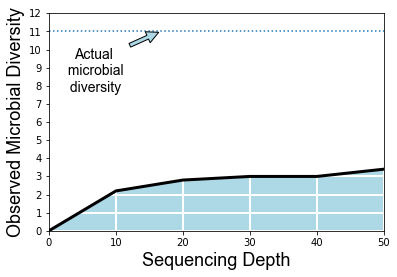

Outputting chart: rarefaction_50


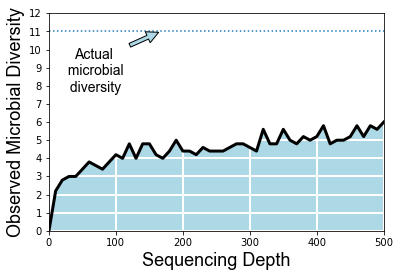

Outputting chart: rarefaction_500


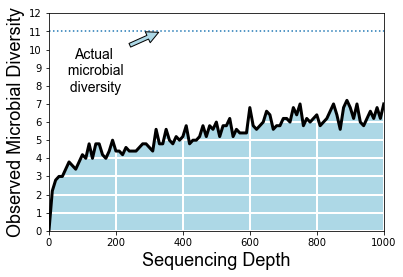

Outputting chart: rarefaction_1000


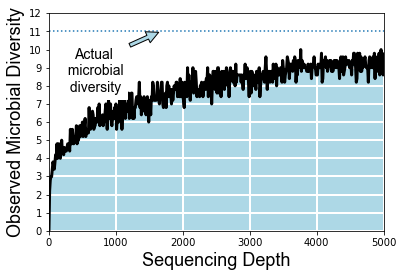

Outputting chart: rarefaction_5000


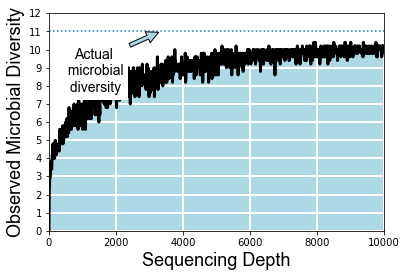

Outputting chart: rarefaction_10000


In [67]:
def rarefaction_graph(x,y,outfile="rarefaction.png",fontsize=18,font="Arial",true_y=11):
    """Graph species vs. sampling effort
    x -- a list of x values
    y -- a list of y values
    outfile -- path to save the graph.  Note that the .png extension is important, as matplotlib 
    guesses output filetype based on suffix
    true_y -- if provided, add a horizontal line at the specified y value
    """
    ax =plt.subplot() 

    # Set the font dictionaries (for plot title and axis titles)
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} 
    
    x_axis_font = {'fontname':font, 'size':fontsize}
    y_axis_font = {'fontname':font, 'size':fontsize}
    
    #Plot the results with a nice thick yellow dot-dashed line
    plt.plot(x,y,c='black',linestyle='-',linewidth=3.0)
    
    #Species vary between 0 and 12
    ax.set_ylim([0,12])
    ax.set_xlim([0,max(x)])
    
    #Color the region between 0 and the line plot a grey color
    ax.fill_between(x,y,facecolor="lightblue")
    
    #Add heavy white gridlines - invisible except inside the plot
    plt.grid(b=True, which='major', color='white', linestyle='-',linewidth=2.0)
       
    #Set the background color
    ax.set_facecolor('white')
    
    #Add a line representing the true community diversity
    if true_y:
        plt.axhline(true_y,linestyle = "dotted")
    
    #Add an annotation showing this value
    
    #Let's put the annotation about 1/3rd of the way across the graph
    annotation_x = max(x)/3.0
    
    #...and at the level of *true* diversity in the samples
    annotation_y = true_y
    
    #Make sure we show every tick on the y-axis
    plt.locator_params(axis='y', nbins=12)

    
    #Specify both where the arrow points and where the text appears
    #for our annotation
    ax.annotate('Actual\n microbial\n diversity', xy=(annotation_x, true_y), font=font, fontsize=14, xycoords='data',\
            xytext=(annotation_x * 0.4,annotation_y * 0.80), textcoords='data', horizontalalignment='center',\
            verticalalignment='center', zorder=3,\
            bbox=dict(facecolor='white', edgecolor='white'),\
            arrowprops=dict(facecolor='lightblue', shrink=0.05))
    
    #Set unique font styles for x and y axis
    plt.ylabel('Observed Microbial Diversity',**y_axis_font)
    plt.xlabel('Sequencing Depth',**x_axis_font)
    plt.savefig(outfile)
    plt.show()

if __name__ == "__main__":
    #This script simulates sampling from microbiomes of various
    #depths, then makes horrible graphs representing them.
    #Your task is to fix the rarefaction_graph function so that 
    #the graphs are less awful.

    #Generate a list of strings representing a microbiome
    microbiome = make_microbiome(total=1000000)
    
    
    graph_depths = [50,500,1000,5000,10000,50000]
    sampling_depths = range(0,10010,10)
    x = []
    y = []
    iterations = 5
    for sampling_depth in sampling_depths: 
        curr_counts = []
        for i in range(iterations):
            microbiome_sample = sample_microbiome(microbiome,sampling_depth)
            curr_count = obs_species(microbiome_sample)
            curr_counts.append(curr_count)
        counts = sum(curr_counts)/len(curr_counts)
        x.append(sampling_depth)
        y.append(counts)
        if sampling_depth in graph_depths:
            rarefaction_graph(x,y,outfile="rarefaction_%i"%sampling_depth)
            print("Outputting chart: rarefaction_%i"%sampling_depth) 

# Exercises

1. Using your graphs as a reference, **answer the following**. You are reading an older publication that found a two-fold difference in species richness between two environments, A and B, with B having about double the observed species diversity of A. However, there is a difference in average sequencing depth between the two: A has on average only 50 sequences per sample, while B  has about 1000. From this information, what can you conclude about the species richness of the real biological communities in environment A and B?  


2. By reading the graphs, make a note of about how many sequences are typically needed to observe 10/12 of the microbes in this simulation. Then, adjust the microbiome simulation function (`make_microbiome`, up above) so that only common microbes are sampled. You can do this by changing all microbes to be 'common' in the body of the function. Now, rerun the code in this notebook and check out the graphs that are produced.  How many sequences per sample — that is, what sequencing depth — is required to reliably find 10/12 microbes? Are more sequences, fewer sequences, or the same number of sequences required to discover all the species compared to the original code where some species are rare and others are common?


3. Community evenness is a measure of whether the abundance of microbes is roughly the same across species (an 'even' community), or if there are some very common microbes and some very rare microbes (an 'uneven' community). Based on your answer to exercise 2, do you think greater sequencing depth would be required to find all the species in a) a very even or b) a very uneven microbiome?  Explain how you think the necessary **sequencing depth** to observe all species in a community is affected by the evenness of a community. *Hint* you are allowed to run simulations, changing the parameters in the above code. These results can help support your answer.


# Further Reading

## [Reading Response & Feedback](https://docs.google.com/forms/d/e/1FAIpQLSeUQPI_JbyKcX1juAFLt5z1CLzC2vTqaCYySUAYCNElNwZqqQ/viewform?usp=pp_url&entry.2118603224=Omics+-+Simulating+the+Effects+of+Sequencing+Depth+on+Estimates+of+Biodiversity)